In [12]:
import pandas as pd
import altair as alt
import numpy as np
from IPython.display import Image

In [4]:
#data = pd.read_csv('./results_4_28_21.csv')
data = pd.read_csv('https://github.com/kevinwbishop/data_vis_a2/raw/main/results_4_28_21.csv')
data = data.melt(id_vars=['plate_RI','plate_thickness','dn_t','immersion','config'], value_vars=['405nm','488nm','561nm','647nm'], var_name='wavelength', value_name='strehl')
data.head()

,plate_RI,plate_thickness,dn_t,immersion,config,wavelength,strehl
0,1.48,0.283,-0.0221,1.56,1,405nm,0.269
1,1.49,0.283,-0.0192,1.56,1,405nm,0.321
2,1.50,0.283,-0.0164,1.56,1,405nm,0.418
3,1.51,0.283,-0.0136,1.56,1,405nm,0.558
4,1.52,0.283,-0.0108,1.56,1,405nm,0.703


In [5]:
wavelengths = ['405nm','488nm','561nm','647nm']
configs = [1,2]
immersions = [1.46,1.56]
color_domain = wavelengths
color_range = ['6B0CF2', '0BADF5', '31E80C', 'F54C38']



In [10]:
'''
selection = alt.selection_single(
    name='Select', # name the selection 'Select'
    fields=['wavelength','config','immersion'], # limit selection to the Major_Genre field
    init={'wavelength': '405nm', 'config':1, 'immersion':1.56}, # use first genre entry as initial value
    bind={'wavelength': alt.binding_select(options=wavelengths), 'config': alt.binding_select(options=configs),
          'immersion': alt.binding_select(options=immersions)}
)
'''

selection = alt.selection_single(
    name='Select', # name the selection 'Select'
    fields=['config','immersion'], # limit selection to the Major_Genre field
    init={'config':1, 'immersion':1.56}, # use first genre entry as initial value
    bind={'config': alt.binding_select(options=configs, labels=['0.1 NA (air), 45˚', '0.12 NA (air), 55˚']),
          'immersion': alt.binding_select(options=immersions)}
)

selectConfig = alt.selection_single(
    name='Select', # name the selection 'Select'
    fields=['config'], # limit selection to the Major_Genre field
    init={'config': configs[0]}, # use first genre entry as initial value
    bind=alt.binding_select(options=configs) # bind to a menu of unique genre values
)

line_chart = alt.Chart(data).mark_line().add_selection(
    selection
).encode(
    x=alt.X('dn_t:Q',
        scale=alt.Scale(domain=[-0.025, 0.025]),
         ),
    y=alt.Y('strehl',
         scale=alt.Scale(domain=[0, 1])
         ),
    color=alt.Color('wavelength',
         scale=alt.Scale(domain=color_domain, range=color_range)
             ),
    opacity=alt.condition(selection, alt.value(0.75), alt.value(0.1)),
    detail =['config', 'immersion'],
    tooltip = alt.Tooltip(['wavelength','strehl','dn_t'])


)

circle_chart = alt.Chart(data).mark_circle().encode(
    x=alt.X('dn_t:Q',
        scale=alt.Scale(domain=[-0.025, 0.025]),
        title='Δn x t',
        axis=alt.Axis(values=[-0.02, -0.01, 0, 0.01, 0.02])
           ),
    y=alt.Y('strehl',
         scale=alt.Scale(domain=[0, 1]),
         title='Strehl ratio',
         ),
    color=alt.Color('wavelength',
         scale=alt.Scale(domain=color_domain, range=color_range),
         legend=alt.Legend(title='Wavelength')
             ),
    opacity=alt.value(0.2),
    detail =['config', 'immersion'],
)

circle_chart + line_chart

alt.LayerChart(...)

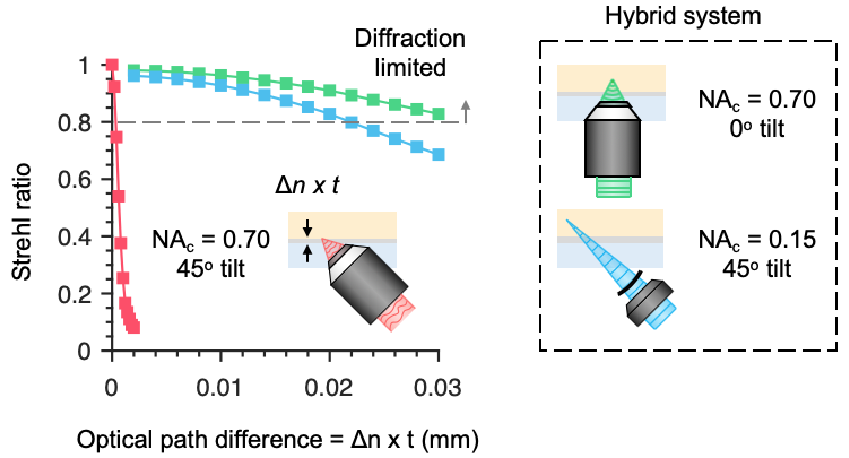

In [13]:
#Image(filename='./adam_biorxiv.png')

In [89]:
im_choice = '1.56'
config_choice = '2'


if config_choice == '1':
    air_NA = '0.1'
    angle = '45˚'
else:
    air_NA = '0.12'
    angle = '55˚'


base = alt.Chart(data).transform_filter(
    ('datum.config == "' + config_choice + '" && datum.immersion=="' + im_choice + '"')
).properties(
    title=('Immersion: ' + im_choice + ', NA in air: ' + air_NA + ', Angle: ' + angle)
).encode(
    alt.X('dn_t:Q',
        scale=alt.Scale(domain=[-0.025, 0.025]),
          title='Δn x t'
         ),
    alt.Y('strehl',
         scale=alt.Scale(domain=[0, 1]),
          title='Strehl ratio'
         ),
    alt.Color('wavelength',
         scale=alt.Scale(domain=color_domain, range=color_range),
        legend=alt.Legend(title='Wavelength')
             ),
    alt.Tooltip(['strehl','dn_t'])
)

base.mark_line() + base.mark_circle()

alt.LayerChart(...)